<a href="https://colab.research.google.com/github/ngotrithu/Rain-in-AUS/blob/main/Rain_in_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks')
!ls dataset

Mounted at /content/drive
Customer-Churn.csv  realestate.csv  train.csv	      weatherAUS.csv
data		    test.csv	    weatherAUS_2.csv  weatherdata.csv


#Mục đích:
* Dự báo xem liệu ngày mai có mưa hay không bằng cách huấn luyện các mô hình phân loại dựa trên biến mục tiêu là `RainTomorrow`
* Bộ dữ liệu này chứa các quan sát trong vòng 10 năm từ nhiều địa điểm khác nhau của nước Úc. `RainTomorrow` là biến mục tiêu, `yes` có nghĩa là ngày mai trời có mưa và lượng mưa lớn hơn 1mm, ngược lại là giá trị `no` thể hiện ngày mai trời không có mưa

###Loading dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset/weatherAUS_2.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


###Exploratory Data Analysis

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

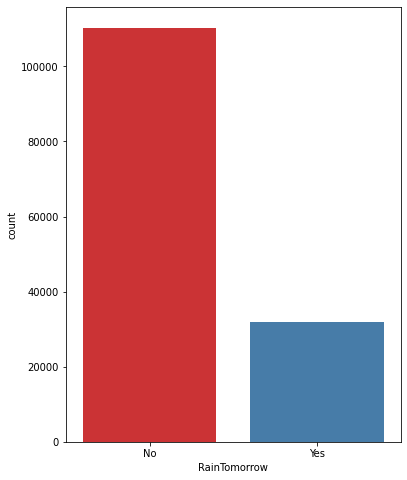

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='RainTomorrow', data=df, palette='Set1')
plt.show()

###Handle Datetime variables

In [ ]:
df['Date'].dtypes

dtype('O')

Biến `Date` là biến Object nên cần phải biến đổi biến Object sang biến `datetime`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
df.drop('Date', axis=1, inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
num_cols = df.select_dtypes(include=['float','int']).columns
cate_cols = df.select_dtypes('O').columns
print('The numerical variables are :', num_cols)
print('The numerical variables are :', cate_cols)

The numerical variables are : Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')
The numerical variables are : Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [ ]:
df[cate_cols].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


###Spliting the data

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Year',
 'Month',
 'Day']

###Handle missing values in categorical variables

In [ ]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Location          0
WindGustDir    2056
WindDir9am     2118
WindDir3pm      859
dtype: int64

In [ ]:
# impute missing categorical variables with most frequent value
for df1 in [X_train, X_test]:
    df1['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df1['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df1['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)

In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

###Handle missing values in numerical variables

In [ ]:
X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
RainToday            0
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
RainToday            0
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df2 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df2[col].fillna(col_median, inplace=True)

In [ ]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

###Detecting and handle Outliers

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,...,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,...,1015.255889,4.447461,4.509930,16.990631,21.68339,0.219167,0.219146,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,...,7.037414,2.887159,2.720357,6.488753,6.93665,0.413683,0.413669,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,...,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [ ]:
df.describe().loc['max']/df.describe().loc['mean']

MinTemp            2.780048
MaxTemp            2.071370
Rainfall         157.142254
Evaporation       26.516800
Sunshine           1.905093
WindGustSpeed      3.372030
WindSpeed9am       9.257000
WindSpeed3pm       4.661716
Humidity9am        1.451783
Humidity3pm        1.940274
Pressure9am        1.022945
Pressure3pm        1.023978
Cloud9am           2.023626
Cloud3pm           1.995596
Temp9am            2.366010
Temp3pm            2.153722
RainToday          4.562735
RainTomorrow       4.563165
Year               1.002102
Month              1.875113
Day                1.972982
dtype: float64

=> Dựa vào tỉ lệ trên dễ dàng phát hiện ra các features có outliers là `Rainfall`, `Evaporation`,`WindSpeed9am`, `WindSpeed3pm`

Text(0, 0.5, 'WindSpeed3pm')

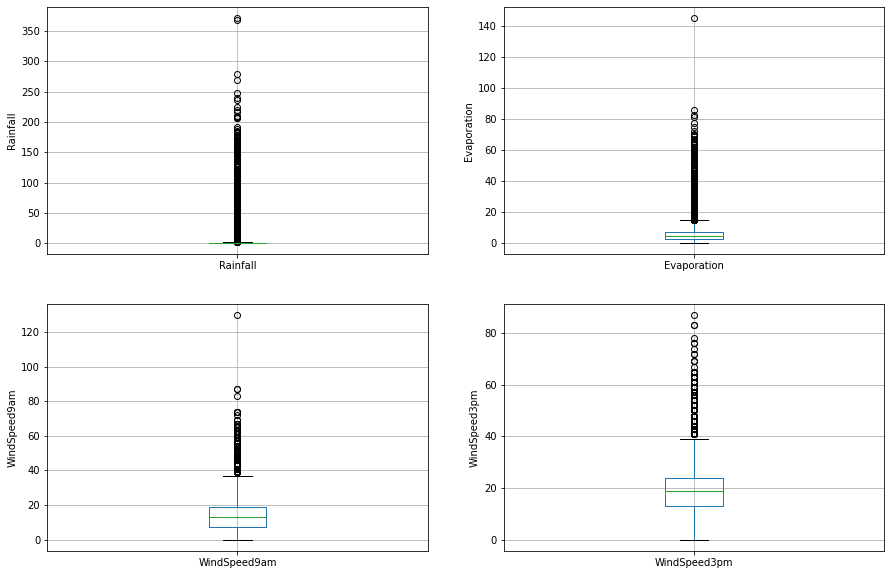

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
# find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


* `Rainfall` có khoảng giá trị từ 0 đến 371 => Những giá trị lớn hơn 3.2 là những outliers cần được loại bỏ

In [ ]:
# find outliers for Evaporation variable
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


* `Evaporation` có khoảng giá trị từ 0 đến 145 => Những giá trị lớn hơn 21.8 là những outliers cần được loại bỏ

In [ ]:
# find outliers for WindSpeed9am variable
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


* `WindSpeed9am` có khoảng giá trị từ 0 đến 130 => Những giá trị lớn hơn 55.0 là những outliers cần được loại bỏ

In [ ]:
# find outliers for WindSpeed3pm variable
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


* `WindSpeed3pm` có khoảng giá trị từ 0 đến 87 => Những giá trị lớn hơn 57.0 là những outliers cần được loại bỏ

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

###Encode categorical variables

In [ ]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm
22926,NorfolkIsland,ESE,ESE,ESE
80735,Watsonia,NE,NNW,NNE
121764,Perth,SW,N,SW
139821,Darwin,ESE,ESE,E
1867,Albury,E,ESE,E


In [ ]:
X_train = pd.concat([X_train[numerical],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


###Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

###SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 90857, 1: 25511})
Resampled dataset shape Counter({1: 90857, 0: 90857})


##Modeling

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    #print("Precision  = {}".format(precision))
    #print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, f1, coh_kap, time_taken

###Logistic Regression

Accuracy = 0.7949264402584904
ROC Area under Curve = 0.7831940806718478
F1 Score  = 0.6193210821847882
Cohen's Kappa = 0.48565708762406645
Time taken = 6.492713928222656
              precision    recall  f1-score   support

           0    0.92353   0.80406   0.85966     22726
           1    0.52149   0.76233   0.61932      6366

    accuracy                        0.79493     29092
   macro avg    0.72251   0.78319   0.73949     29092
weighted avg    0.83556   0.79493   0.80707     29092



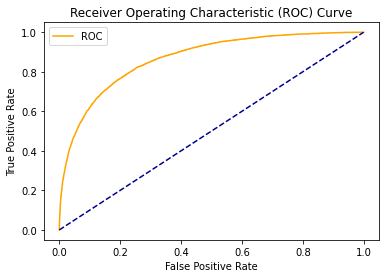

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


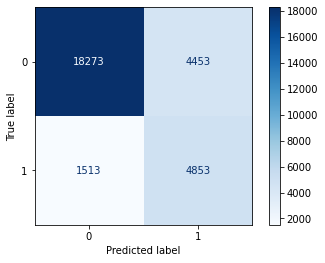

In [ ]:
# Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)
model_lrsmt, accuracy_lrsmt, roc_auc_lrsmt,f1_score_lrsmt,coh_kap_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smote, y_train_smote, X_test, y_test)

###Decision Tree

Accuracy = 0.7683899353774234
ROC Area under Curve = 0.7238033617661415
F1 Score  = 0.5491167023554605
Cohen's Kappa = 0.39784833218564575
Time taken = 0.9276783466339111
              precision    recall  f1-score   support

           0    0.88969   0.80309   0.84417     22726
           1    0.47832   0.64452   0.54912      6366

    accuracy                        0.76839     29092
   macro avg    0.68400   0.72380   0.69664     29092
weighted avg    0.79967   0.76839   0.77961     29092



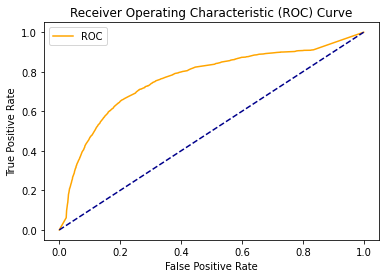

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


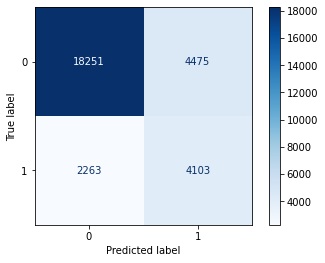

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt,coh_kap_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smote, y_train_smote, X_test, y_test)

###Random Forest

Accuracy = 0.8288876667124983
ROC Area under Curve = 0.7749645554137837
F1 Score  = 0.6346153846153846
Cohen's Kappa = 0.5235253241232516
Time taken = 53.682321071624756
              precision    recall  f1-score   support

           0    0.90643   0.87085   0.88829     22726
           1    0.59562   0.67908   0.63462      6366

    accuracy                        0.82889     29092
   macro avg    0.75102   0.77496   0.76145     29092
weighted avg    0.83842   0.82889   0.83278     29092



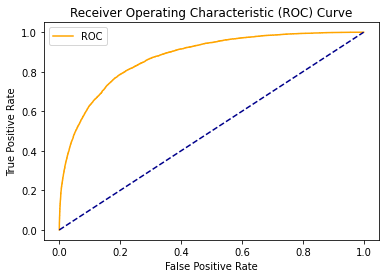

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


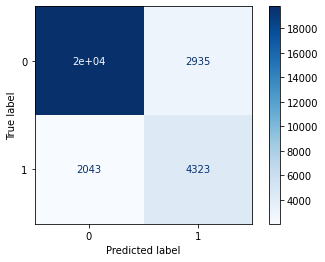

In [ ]:
# Random Forest with SMOTE
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rfsmt = RandomForestClassifier(**params_rf)
model_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt,coh_kap_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smote, y_train_smote, X_test, y_test)

###LightGBM

Accuracy = 0.8615426921490444
ROC Area under Curve = 0.7546473196278445
F1 Score  = 0.6408701854493581
Cohen's Kappa = 0.5570421730429973
Time taken = 30.22833275794983
              precision    recall  f1-score   support

           0    0.88565   0.94473   0.91424     22726
           1    0.74103   0.56456   0.64087      6366

    accuracy                        0.86154     29092
   macro avg    0.81334   0.75465   0.77755     29092
weighted avg    0.85401   0.86154   0.85442     29092



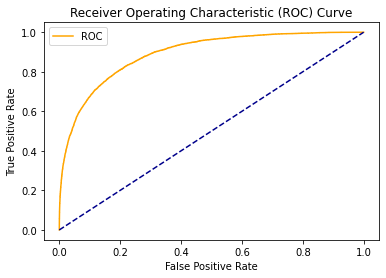

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


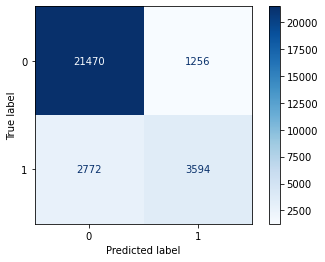

In [ ]:
# Light GBM with SMOTE
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgbsmt = lgb.LGBMClassifier(**params_lgb)
model_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt,coh_kap_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train_smote, y_train_smote, X_test, y_test)

###Catboost


     |████████████████████████████████| 76.1 MB 1.2 MB/s 
Learning rate set to 0.5
0:	learn: 0.4759198	total: 39.3s	remaining: 12m 26s
1:	learn: 0.3991999	total: 1m 18s	remaining: 11m 49s
2:	learn: 0.3514266	total: 1m 57s	remaining: 11m 4s
3:	learn: 0.3251409	total: 2m 58s	remaining: 11m 55s
4:	learn: 0.2928741	total: 3m 38s	remaining: 10m 55s
5:	learn: 0.2746339	total: 4m 17s	remaining: 10m
6:	learn: 0.2576814	total: 4m 57s	remaining: 9m 12s
7:	learn: 0.2471524	total: 5m 36s	remaining: 8m 24s
8:	learn: 0.2385728	total: 6m 16s	remaining: 7m 40s
9:	learn: 0.2299649	total: 6m 55s	remaining: 6m 55s
10:	learn: 0.2220407	total: 7m 34s	remaining: 6m 11s
11:	learn: 0.2164543	total: 8m 13s	remaining: 5m 28s
12:	learn: 0.2117644	total: 8m 52s	remaining: 4m 46s
13:	learn: 0.2042712	total: 9m 32s	remaining: 4m 5s
14:	learn: 0.1988682	total: 10m 22s	remaining: 3m 27s
15:	learn: 0.1934828	total: 11m 2s	remaining: 2m 45s
16:	learn: 0.1873293	total: 11m 42s	remaining: 2m 3s
17:	learn: 0.1820002	total

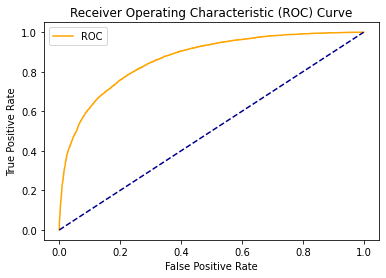

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


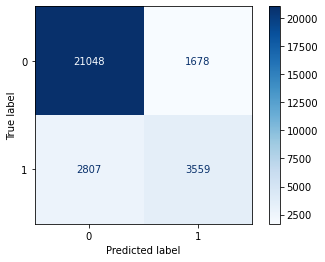

In [ ]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt,coh_kap_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train_smote, y_train_smote, X_test, y_test)

###XGBoost

Accuracy = 0.8459370273614739
ROC Area under Curve = 0.7636000031961576
F1 Score  = 0.6367909238249595
Cohen's Kappa = 0.5391497656176816
Time taken = 127.59536504745483
              precision    recall  f1-score   support

           0    0.89458   0.91001   0.90223     22726
           1    0.65768   0.61719   0.63679      6366

    accuracy                        0.84594     29092
   macro avg    0.77613   0.76360   0.76951     29092
weighted avg    0.84274   0.84594   0.84415     29092



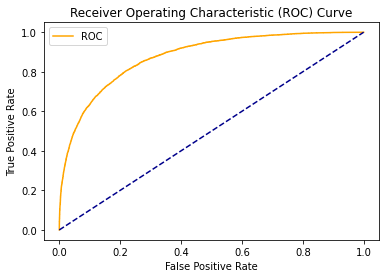

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


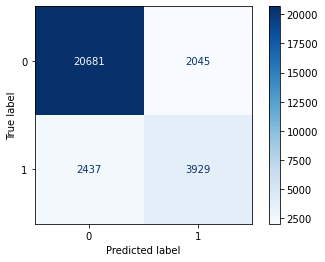

In [ ]:
# XGBoost with SMOTE
import xgboost as xgb
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgbsmt = xgb.XGBClassifier(**params_xgb)
model_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, f1_score_xgbsmt,coh_kap_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train_smote, y_train_smote, X_test, y_test)

###Model Selection
* Sau khi huấn luyện 6 mô hình thì chúng ta cần phải chọn ra mô hình tốt nhất dựa trên F1-Score, ROC_AUC, Cohen's Kappa và Thời gian huấn luyện mô hình để tiến hành tuning hyperparameters nhằm cải thiện thêm độ chính xác của mô hình. Với bộ dữ liệu mất cân bằng để lựa chọn mô hình thông thường chúng ta cần dựa vào các metrics là `f1-score` nhưng vì chúng ta đã xử lý sự mất cân bằng dữ liệu bằng phương pháp SMOTE() nên ở trường hợp này chúng ta sẽ lựa chọn metrics `Accuracy`
* Ngoài ra để phục vụ cho việc ra quyết định tốt hơn, với bộ dữ liệu mất cân bằng chúng ta có thể lựa chọn mô hình theo Cohen's Kappa

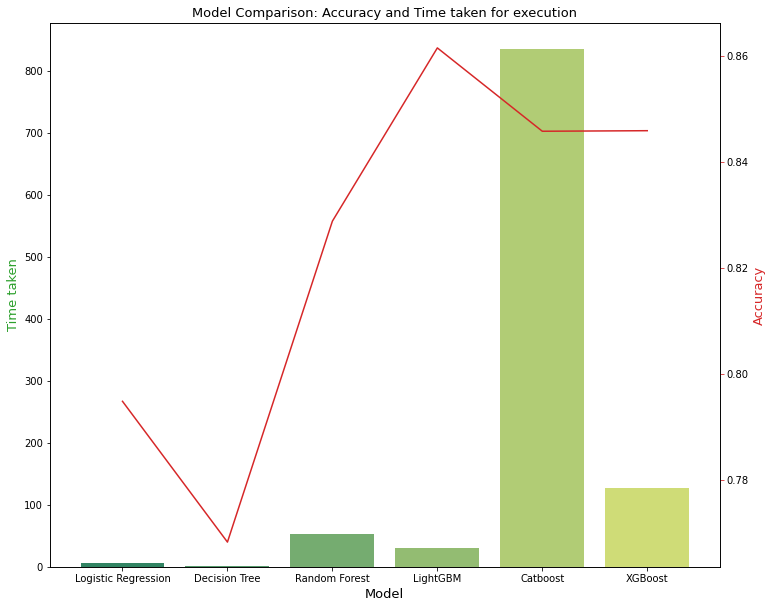

In [ ]:
accuracy_scores = [accuracy_lrsmt, accuracy_dtsmt, accuracy_rfsmt, accuracy_lgbsmt, accuracy_cbsmt, accuracy_xgbsmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_dtsmt, roc_auc_rfsmt, roc_auc_lgbsmt, roc_auc_cbsmt, roc_auc_xgbsmt]
f1_scores = [f1_score_lrsmt, f1_score_dtsmt, f1_score_rfsmt, f1_score_lgbsmt, f1_score_cbsmt, f1_score_xgbsmt]
coh_kap_scores = [coh_kap_lrsmt, coh_kap_dtsmt,coh_kap_rfsmt, coh_kap_lgbsmt, coh_kap_cbsmt, coh_kap_xgbsmt]
tt = [tt_lrsmt, tt_dtsmt, tt_rfsmt, tt_lgbsmt, tt_cbsmt, tt_xgbsmt]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': f1_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

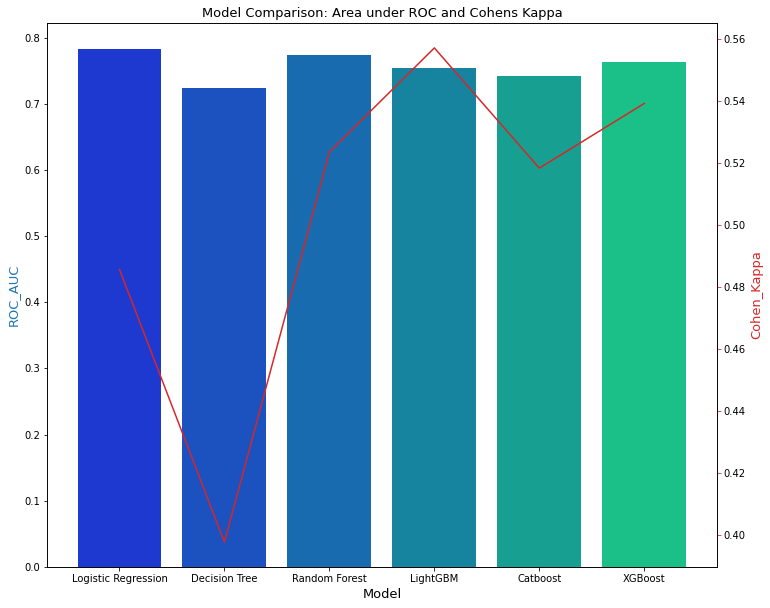

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

Chúng ta có thể dễ dàng nhận thấy mô hình LightGBM cho độ chính xác tốt nhất 86.15% và tổng thời gian huấn luyện thấp nhất.
Đây là một tiêu chí tiêu chí quan trọng để deploy mô hình lên các thiết bị yếu mà không cần quá nhiều tài nguyên tính toán.
Do đó, chúng ta sẽ lựa chọn mô hình này để tiến hành tuning hyperparameters

##RandomizedSearchCV

In [ ]:
start = time.time()
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()

#Define the parameters
param_grid = {'num_leaves':[20,40,60,80], 'min_child_samples':[5,10,15],'max_depth':[2,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

#Define the scoring
random_search = RandomizedSearchCV(lgb, param_grid, scoring='accuracy',n_iter=100, n_jobs = -1,cv = 5)
random_result = random_search.fit(X_train_smote,y_train_smote)
scores = random_result.best_score_
print("Best Score: %f using %s" % (scores, random_result.best_params_))
end = time.time()
print('Execution time is:')
print(end - start)

Best Score: 0.889348 using {'reg_alpha': 0, 'num_leaves': 80, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.2}
Execution time is:
3432.962617635727


* Sau khi tiến hành RandomSearchCV kéo dài gần 1 tiếng chúng ta đã tìm ra được những siêu tham số tốt nhất cho mô hình.
* Chúng ta đã cải thiện thêm được độ chính xác của mô hình từ 86.15% lên 88.93 lên 2.78% (một sự cải thiện khá tốt)